In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go 
import plotly.figure_factory as ff 
import os
print(os.listdir("D:\Databases"))



['BlackFriday.csv', 'supermarket_sales.csv', 'us-car-models-data-master']


In [4]:
df=pd.read_csv('D:\Databases\BlackFriday.csv')
df.shape
df.head(100)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1000019,P00251642,M,0-17,10,A,3,0,1,2.0,4.0,4211
96,1000019,P00244842,M,0-17,10,A,3,0,11,NaN,NaN,1539
97,1000021,P00220242,M,18-25,16,B,0,0,3,12.0,NaN,3055
98,1000022,P00351142,M,18-25,15,A,4+,0,1,8.0,17.0,12099


In [68]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


1. Gender 

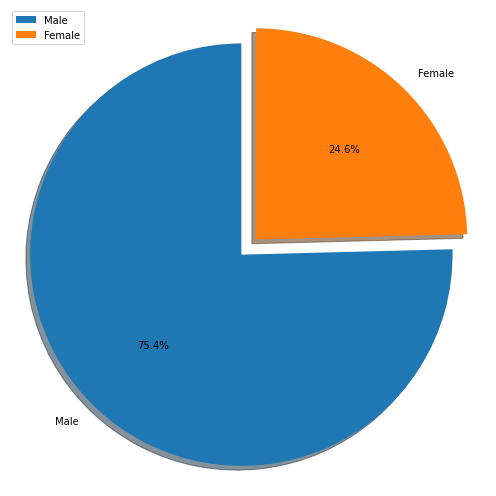

In [6]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('scaled')  
plt.tight_layout()
plt.legend()
plt.show()

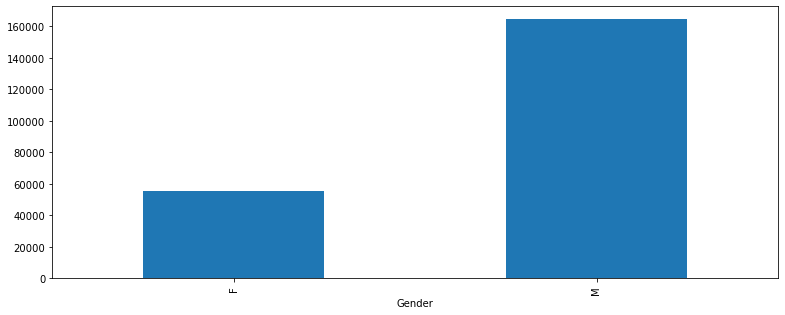

In [35]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(13,5))
    df.groupby(group)[column].sum().sort_values().plot(kind='bar')
    
plot('Gender','Marital_Status','bar')

In [ ]:
2.Age

C:\Users\More\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='count'>

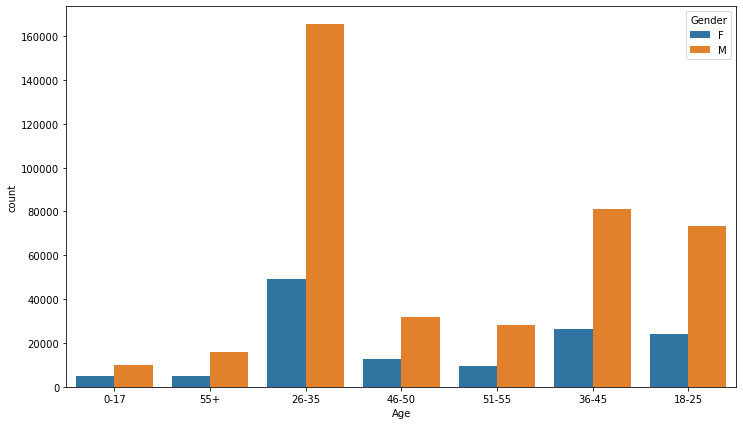

In [16]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['Age'],hue= df['Gender'])

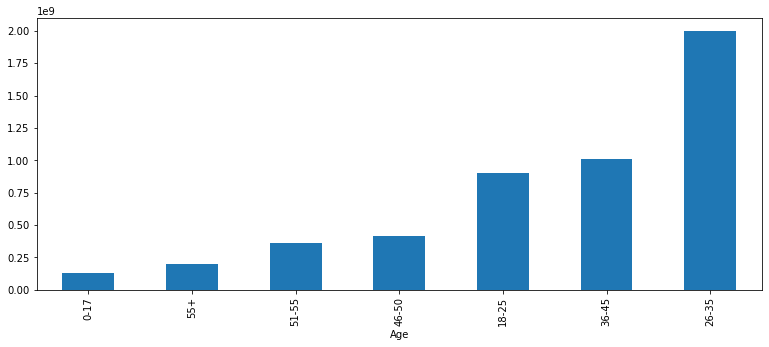

In [17]:
plot('Age','Purchase','plot')

3. City

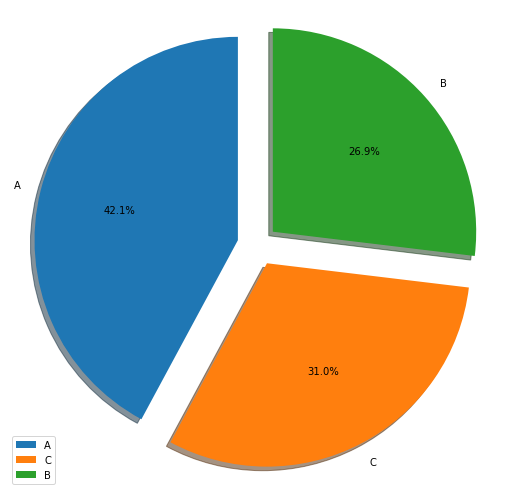

In [75]:
explode = (0.1,0.1,0.1)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['City_Category'].value_counts(), explode = explode, labels = df['City_Category'].unique(), autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('scaled')  
plt.tight_layout()
plt.legend()
plt.show()

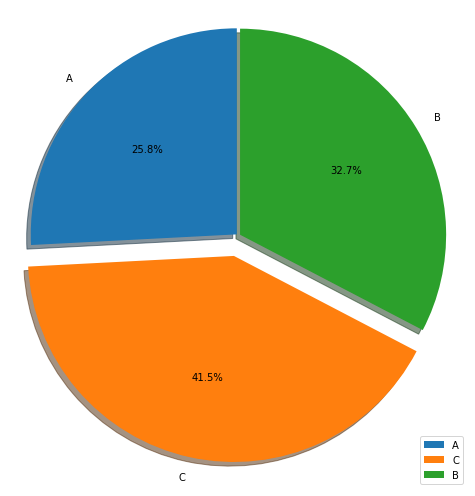

In [76]:
explode = (0.01,0.1,0.01)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('City_Category')['Purchase'].sum(), explode = explode, labels = df['City_Category'].unique(), autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('scaled')  
plt.tight_layout()
plt.legend()
plt.show()

C:\Users\More\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='City_Category', ylabel='count'>

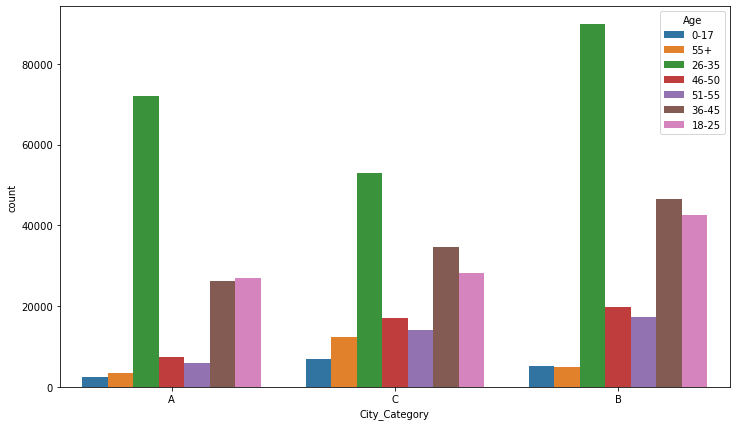

In [7]:
fig1, ax1= plt.subplots(figsize=(12,7))
sns.countplot(df['City_Category'], hue=df['Age'])

City A is the most cities followed by B and then C, the distribution of ages on the procurement map is very close, we have to focus on that category of work averages of 36-45

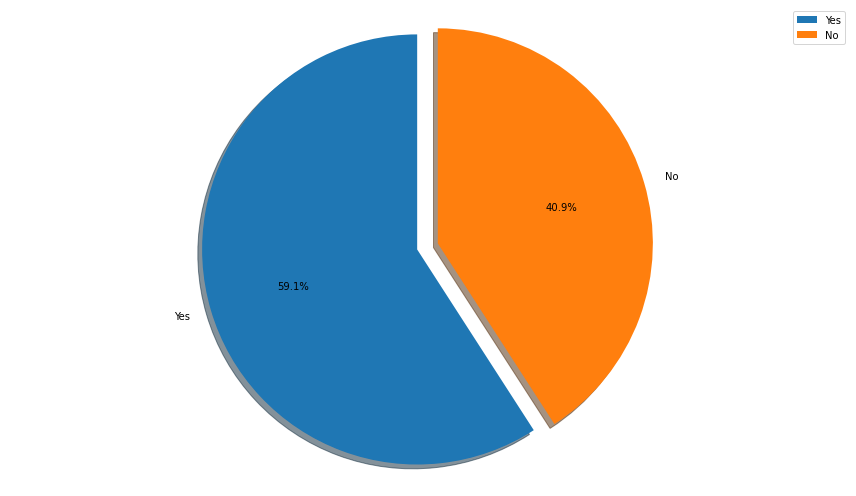

In [85]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Marital_Status'].value_counts(), explode = explode, labels = ['Yes','No'], autopct='%1.1f%%',shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Most of our customers are more than 60% married, I see that the strategy of targeting families to ensure more clients succeed

4. Stabily

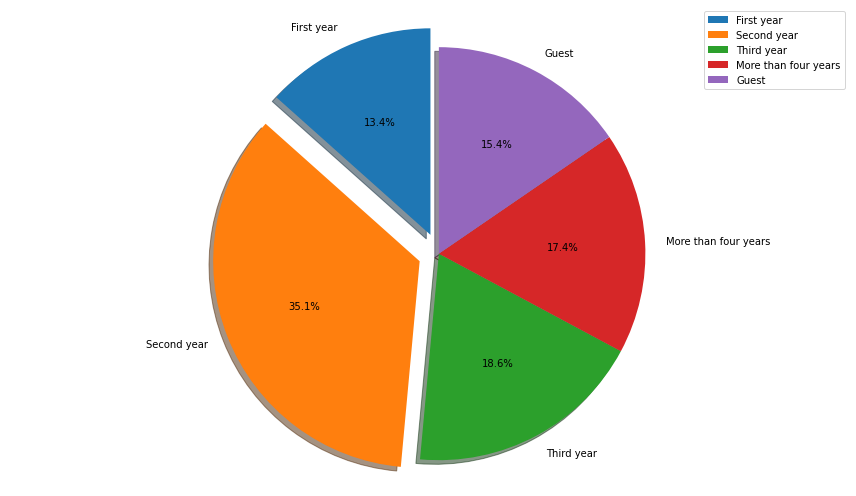

In [102]:
labels= ['First year','Second year','Third year','More than four years','Guest']
explode=(0.1, 0.1, 0, 0, 0)
fig1, ax1 =plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),
 explode=explode, labels=labels, autopct='%1.1f%%', 
 shadow=True, startangle= 90)

#Equal aspect ratio ensures that pie is draw as circle
ax1.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

The number people stayed in the city

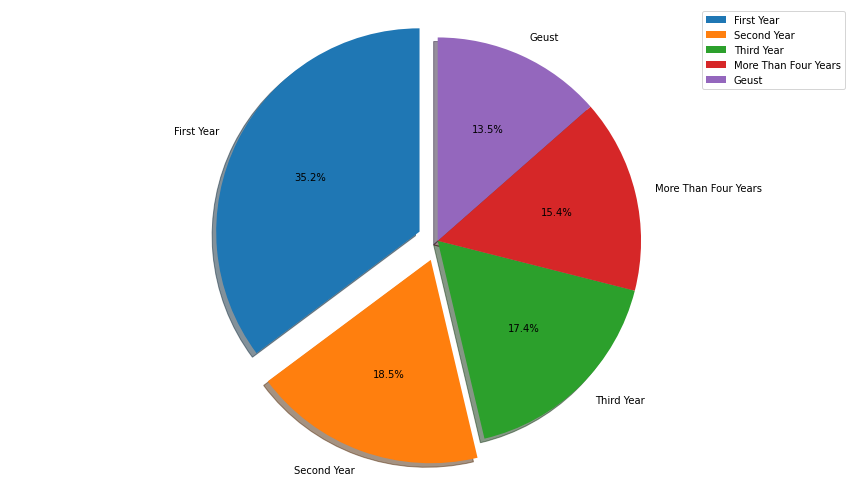

In [110]:
#labels=['First Year','Second Year','Third Year','More Than Four Years','Geust']
#label=['Underage 0-17','Retired +55','Middleage 26-35','46-50 y/o','Oldman 51-55','Middleage+ 36-45','Youth']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Stay_In_Current_City_Years'].value_counts(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

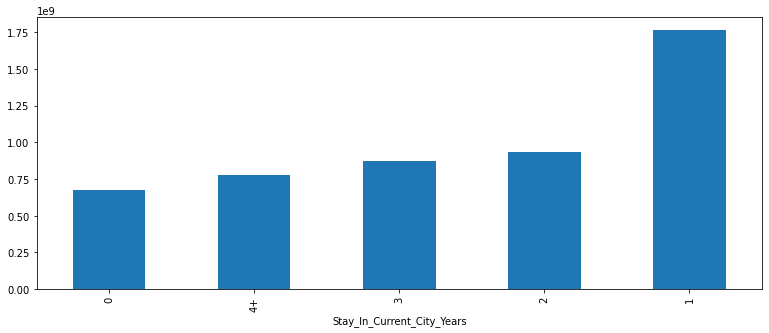

In [37]:
plot('Stay_In_Current_City_Years','Purchase','bar')


We have worked hard in the past two years and have achieved a large percentage of sales from the new population of cities, but these figures indicate that the older city dwellers have less passion for our products. I do not know in fact look at it for yourselves why old city dwellers did not achieve higher sales of the population New visitors or visitors from outside the city?
We have almost gained about 1.75 billion new city residents only!

5.Occupation


<AxesSubplot:>

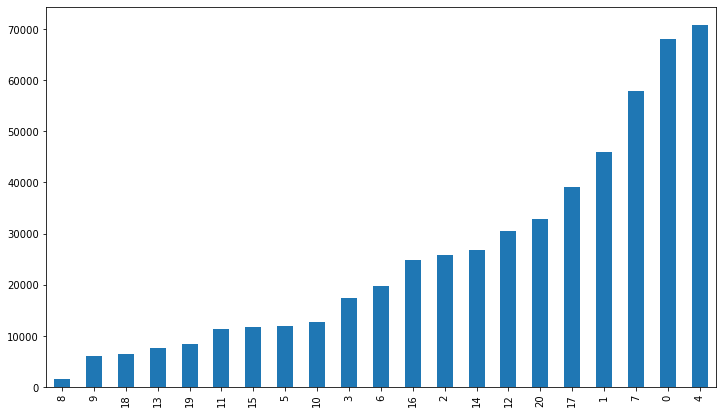

In [32]:

fig1, ax1 = plt.subplots(figsize=(12,7))
df['Occupation'].value_counts().sort_values().plot(kind='bar')

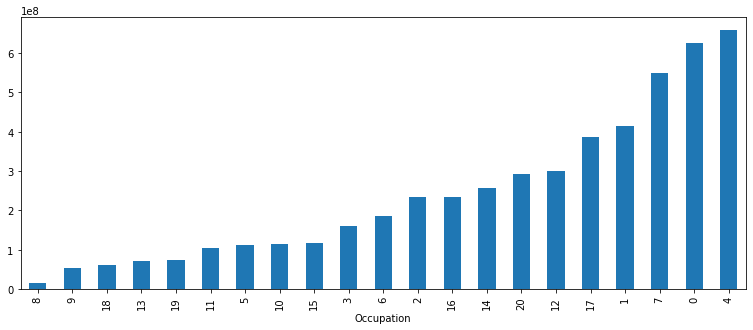

In [36]:
plot('Occupation','Purchase','bar')

We also note here that purchasing power is closely related to the Occupation in some cases as the first class of the table but there are some differences we will notice when checking the number of purchases and the value of those purchases total.

6. Product and Category based

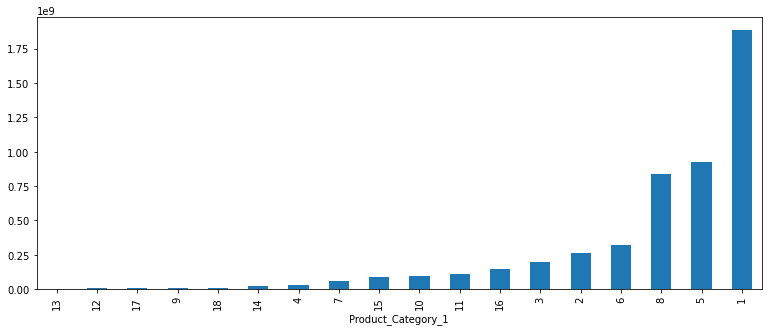

In [43]:
plot('Product_Category_1','Purchase','barh')

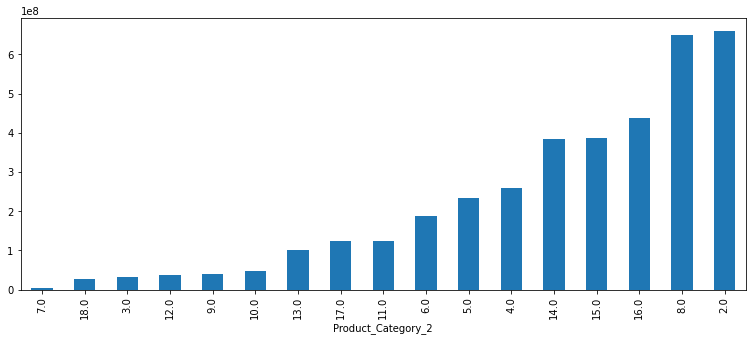

In [45]:
plot('Product_Category_2','Purchase','bar')


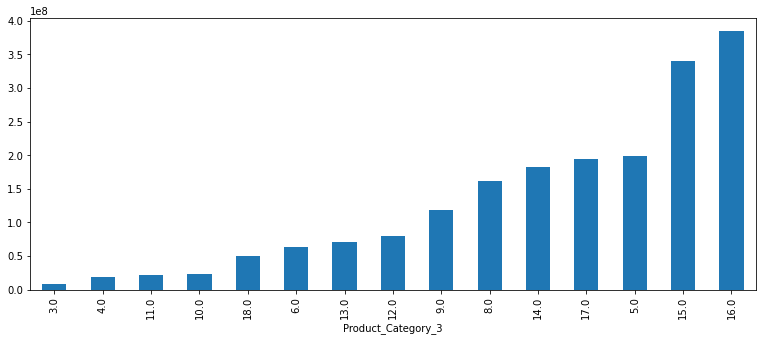

In [47]:
plot('Product_Category_3','Purchase','barh')


<AxesSubplot:ylabel='Product_ID'>

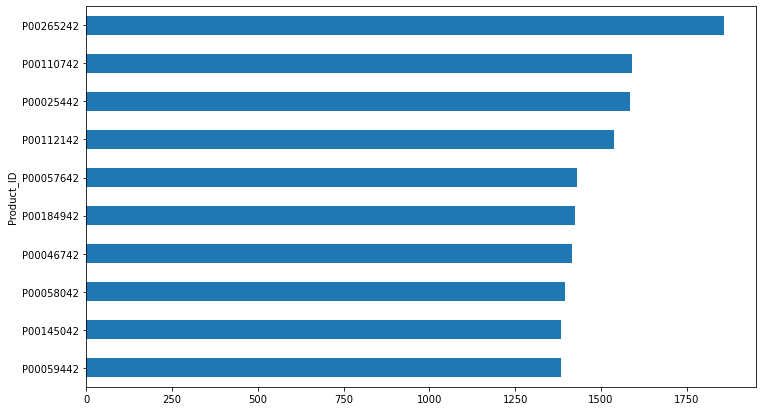

In [60]:
fig1,ax1 =plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Purchase'].count().nlargest(10).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='Product_ID'>

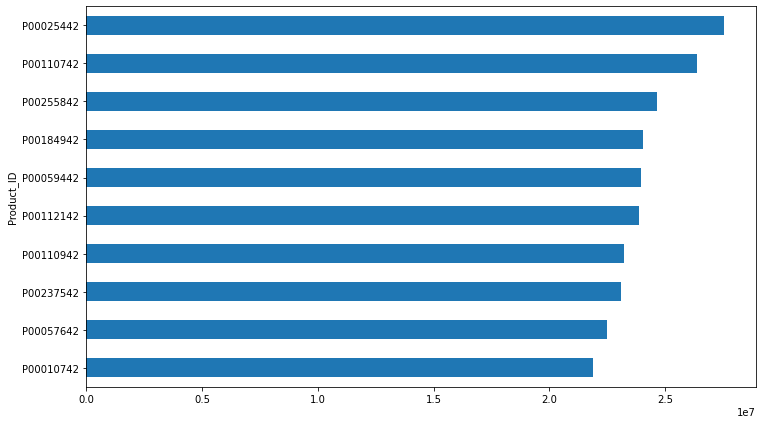

In [70]:
#Used to find highest sold product using the product ID

fig1,ax1 =plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='barh')

CONCLUSION

Well, now we have the top 10 products for the top 10 profits , and first 10 category for each products. Remember that I may have been explored, but this is where your next task begins. The goal of this kernel is to teach you how to analyze how to compare things to each other, How to add information you can tell yourself and tell the stakeholders.

On the Black Friday Day, people from different cities went to a shop and Kanu were quiet at x, y, z, and their average age was 19-45 and we gained sales by x billoin dollar.